<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

We have a dataset with details of a bank's customers, and the target variable is a binary variable that reflects whether the customer has left the bank (closed his/her account) or remains a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

---
---

## Import  libraries & data

In [5]:
# tfcpu envoirement used
# !pip install livelossplot

In [2]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
# Importing libraries for DL and ML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF # 

In [7]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Exploratory Data Analysis and Visualization

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
df.shape

(10000, 13)

In [10]:
df.isnull().sum().any() # No missing values

False

In [11]:
df.duplicated().sum() # No duplicates

0

In [12]:
df.describe().T # summary statistics



,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [13]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

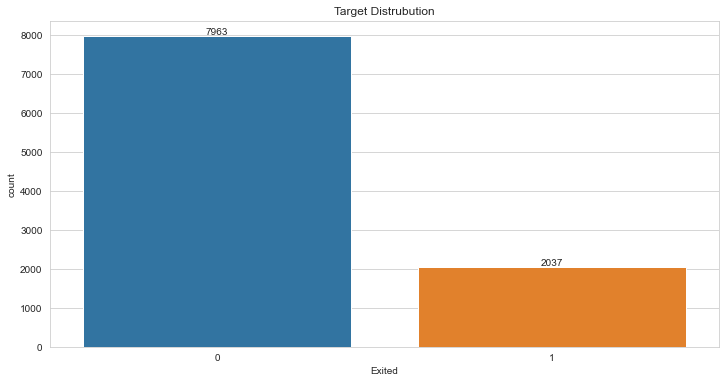

In [14]:
ax = sns.countplot(df["Exited"])
ax.set_title("Target Distrubution")
ax.bar_label(ax.containers[0]);

In [19]:
#!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


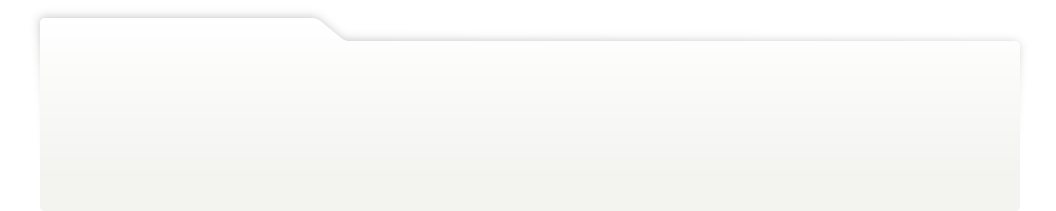
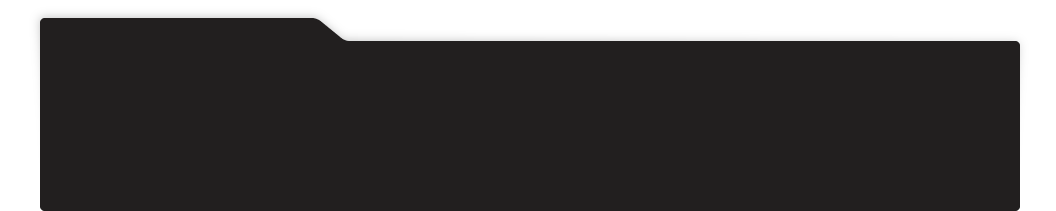
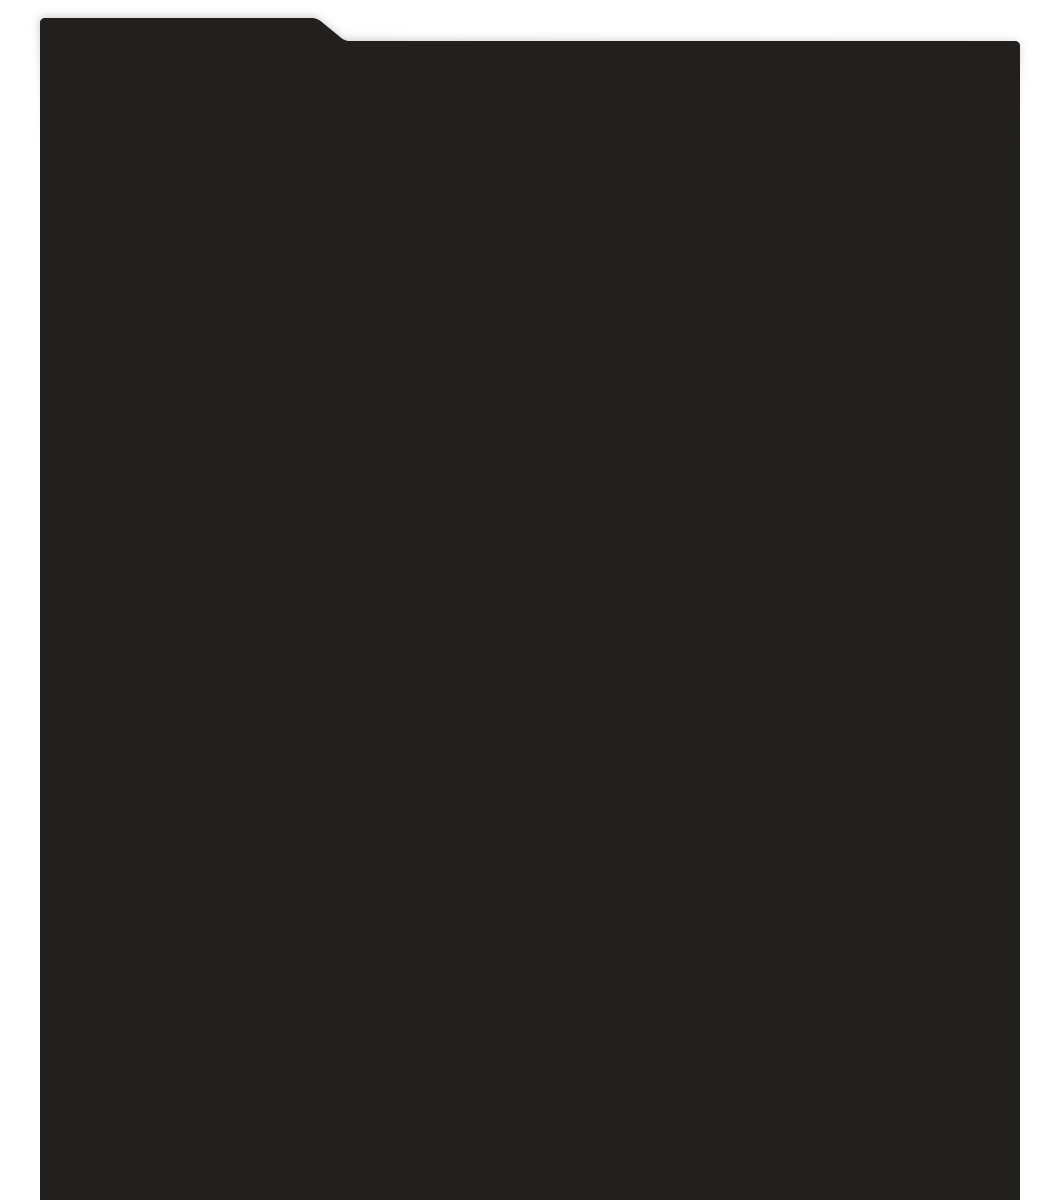
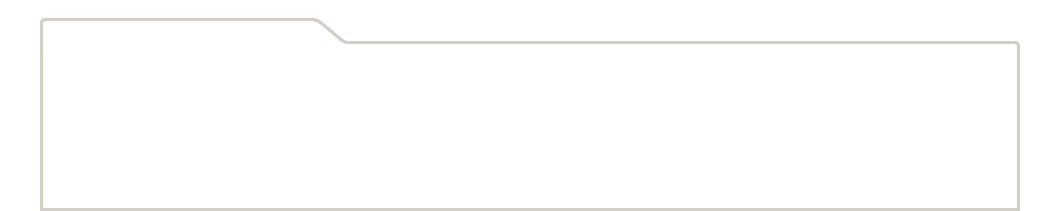
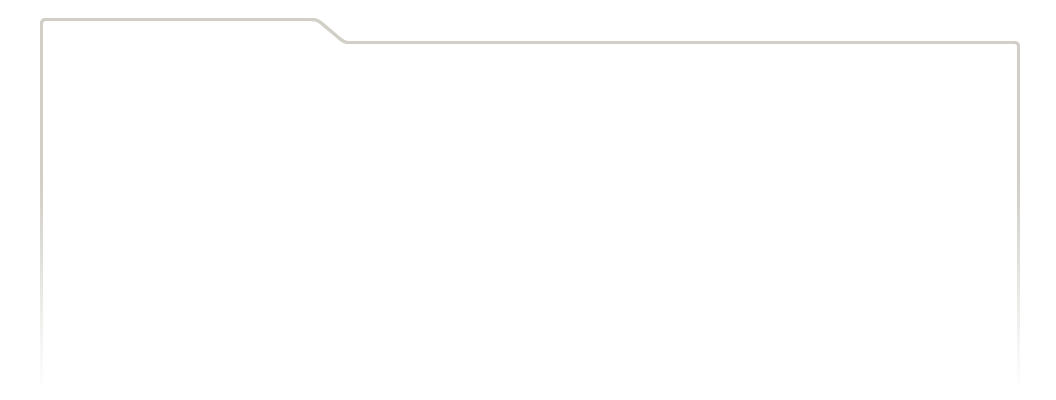
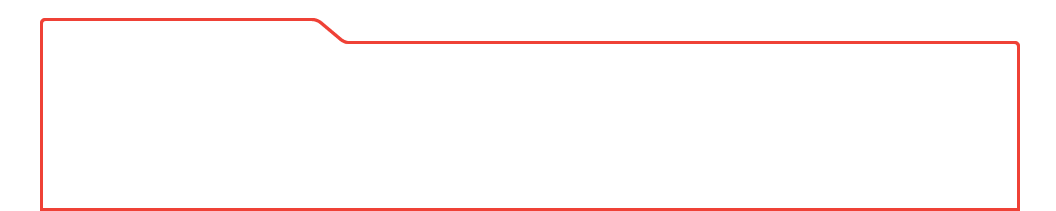
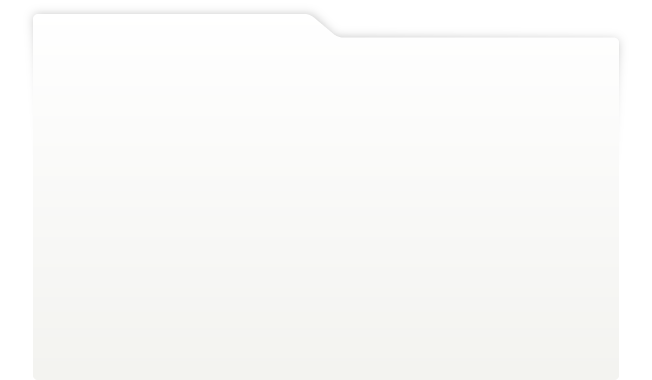
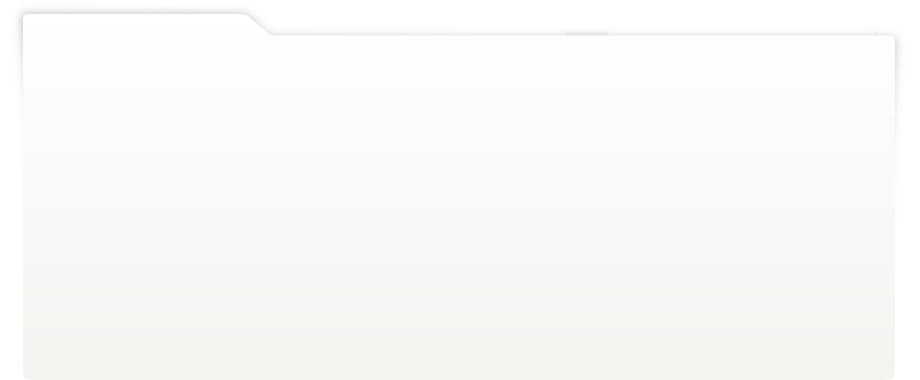
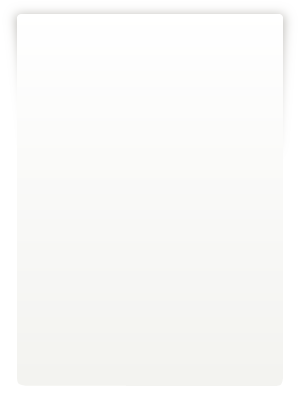
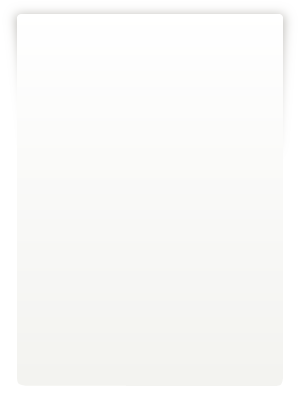
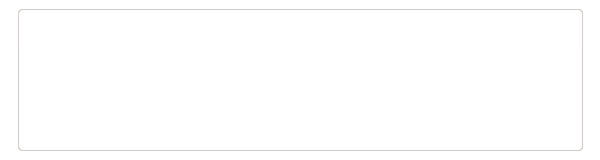
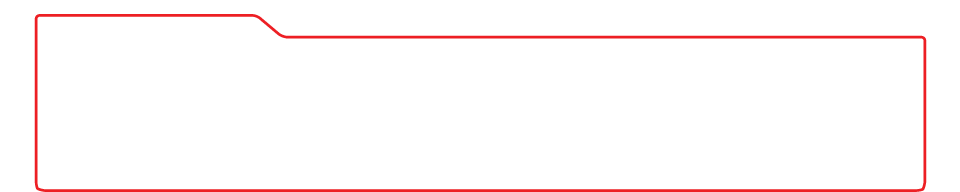
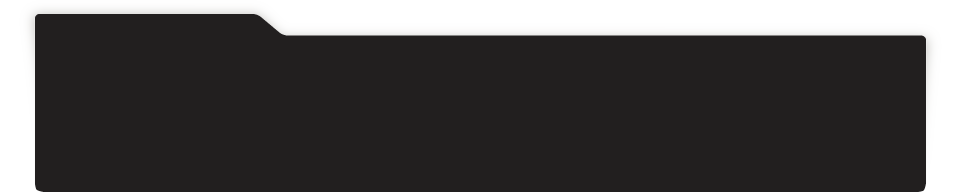
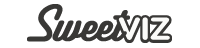
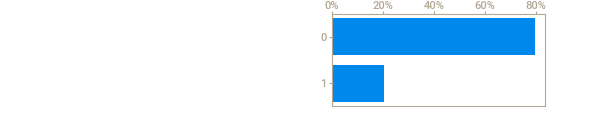
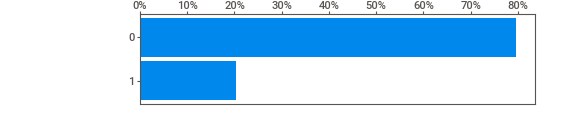
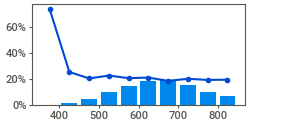
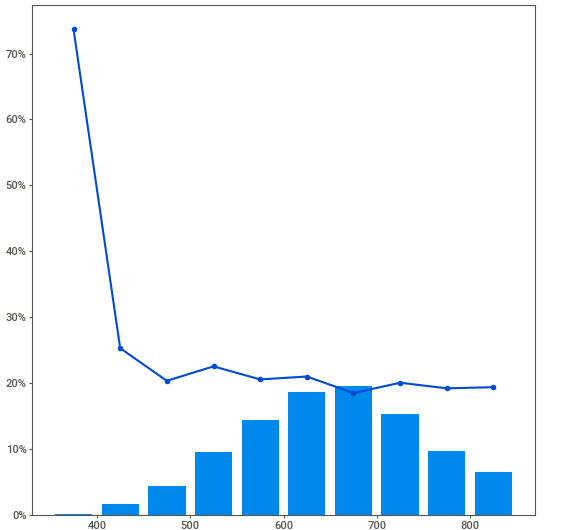
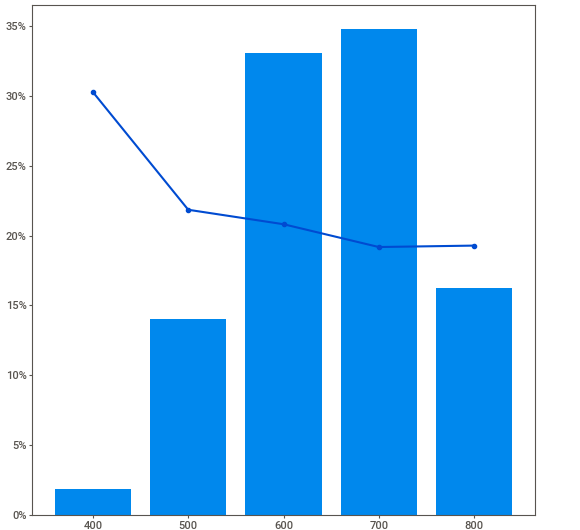
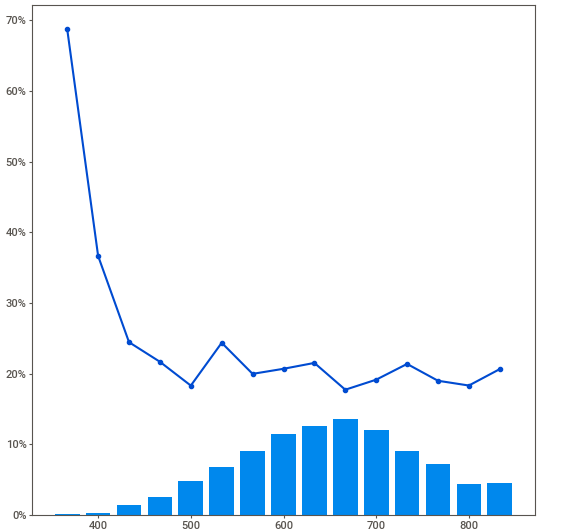
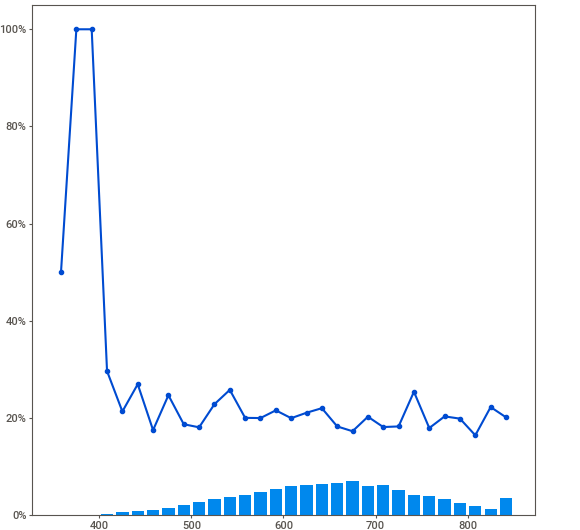
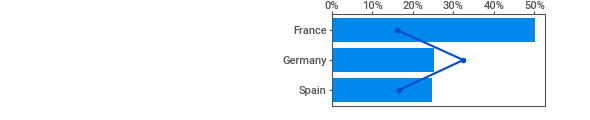
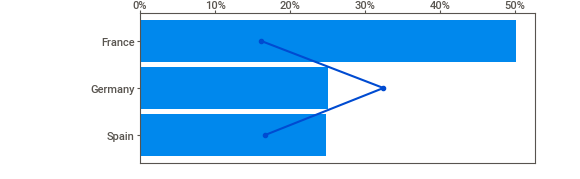
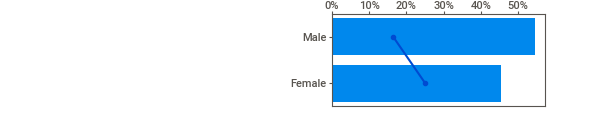
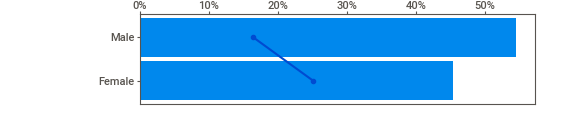
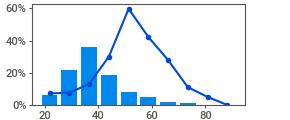
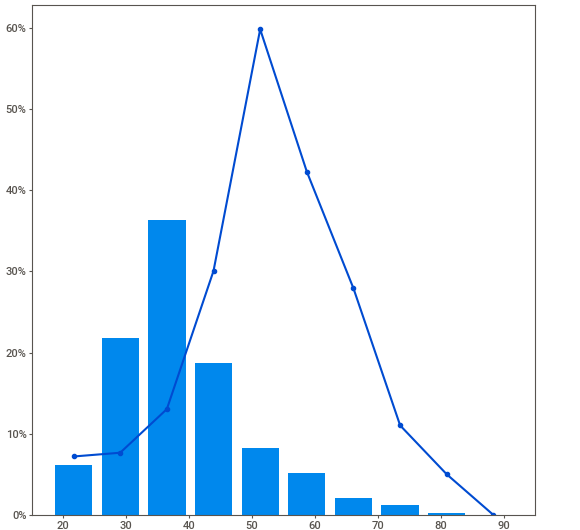
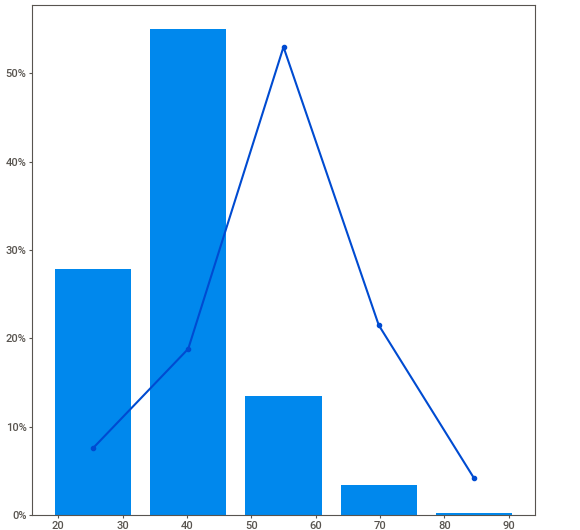
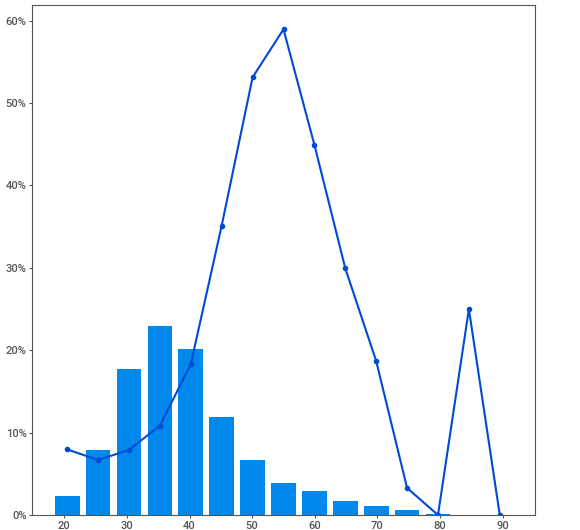
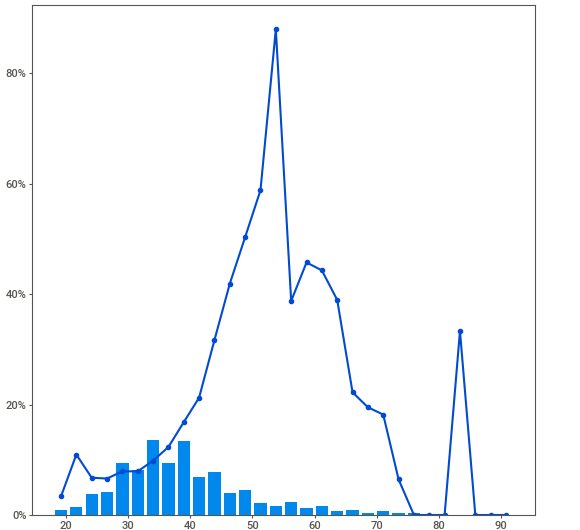
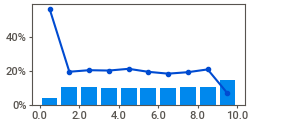
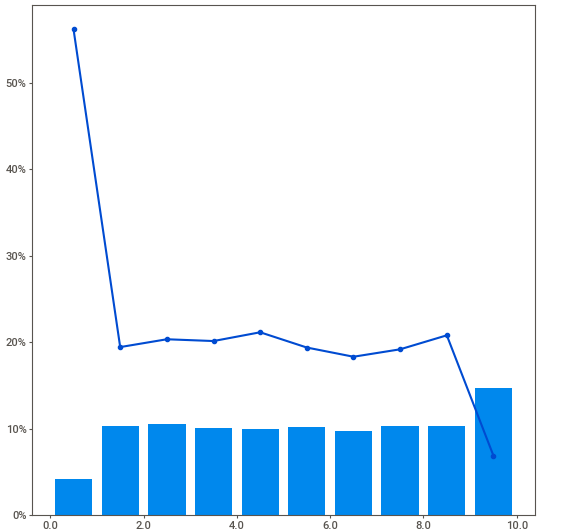
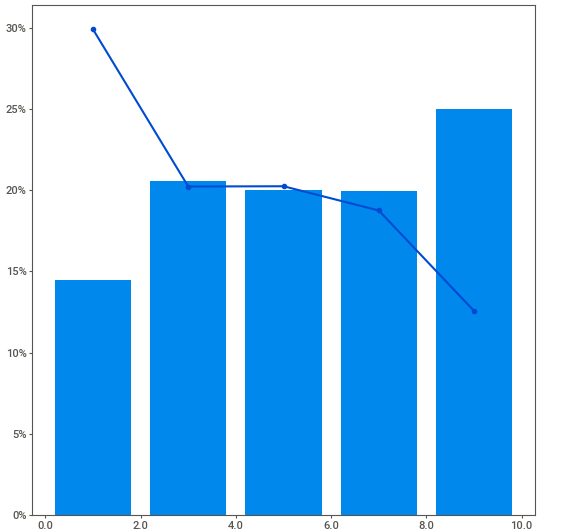
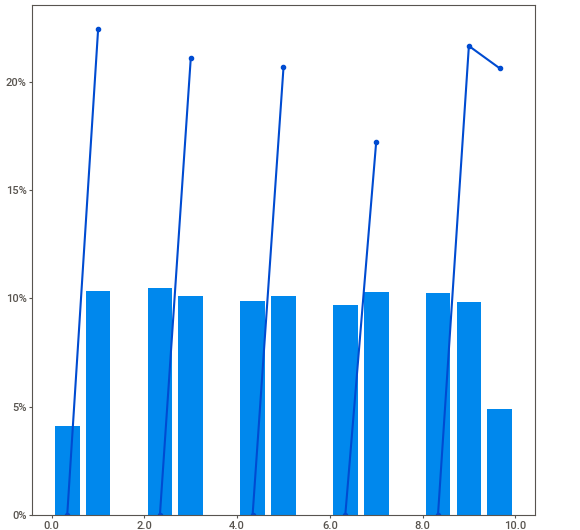
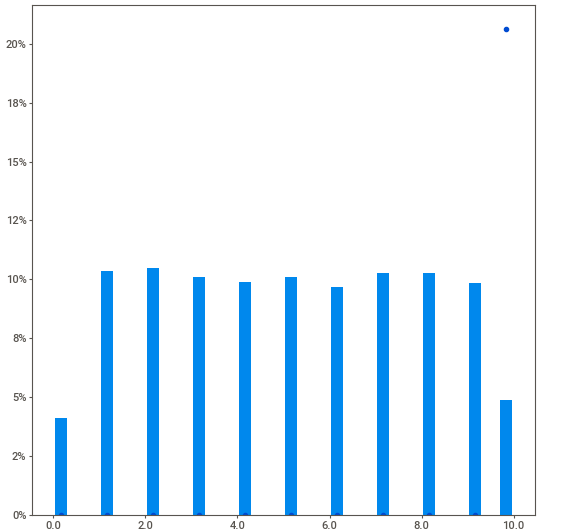
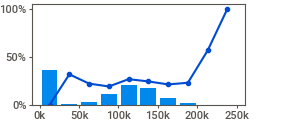
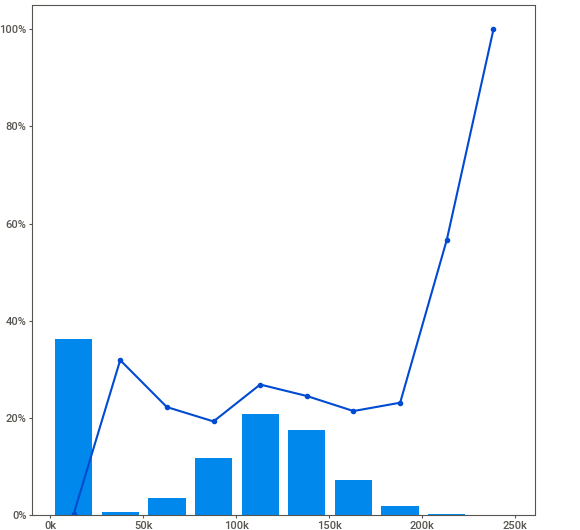
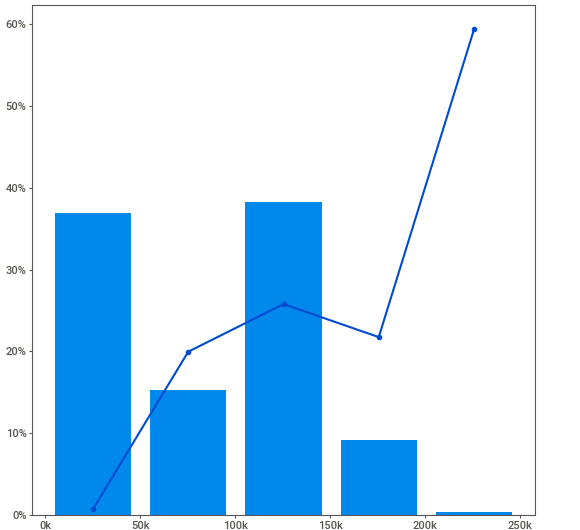
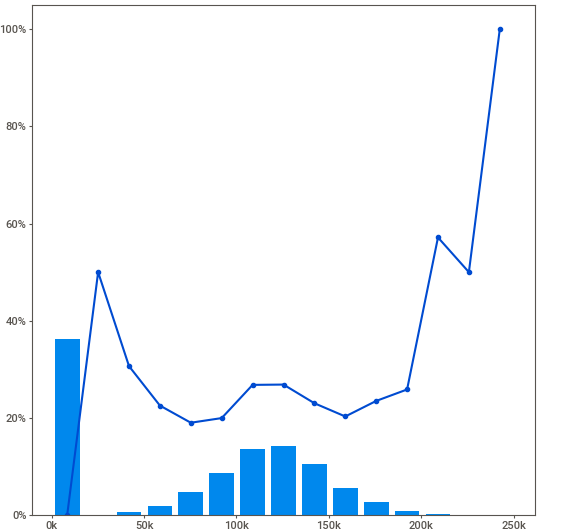
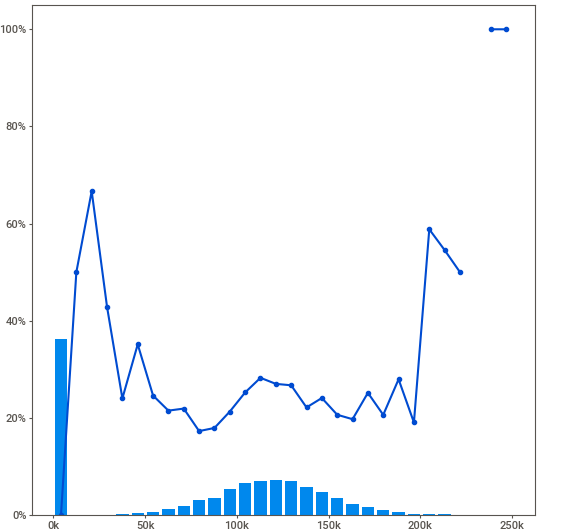
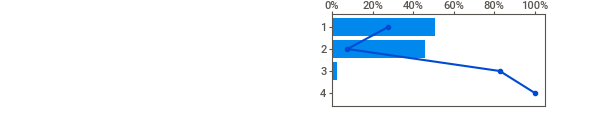
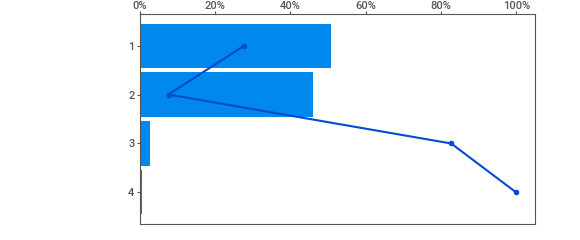
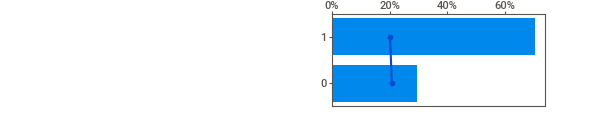
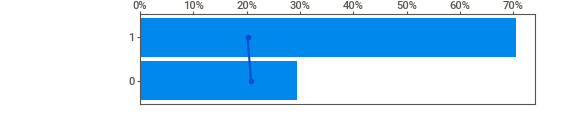
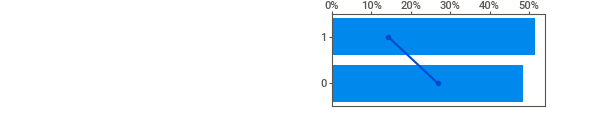
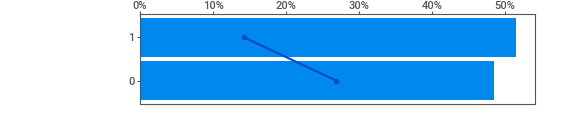
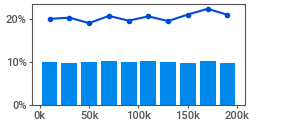
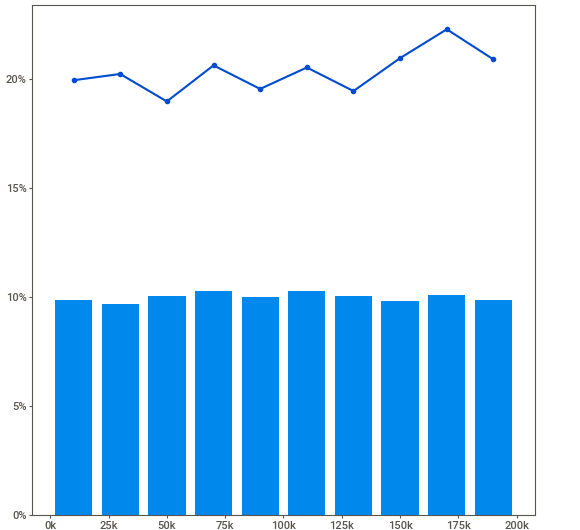
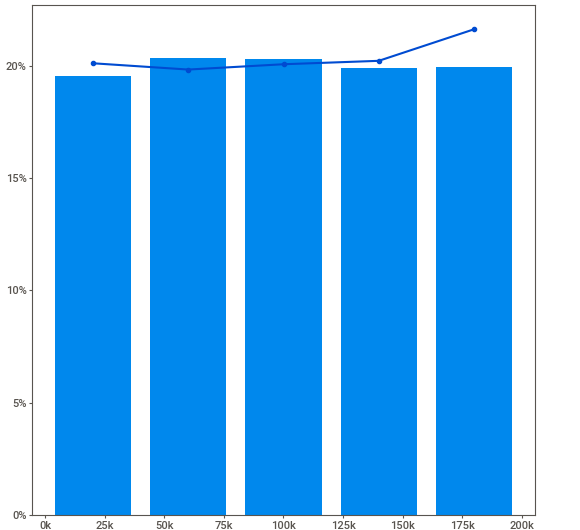
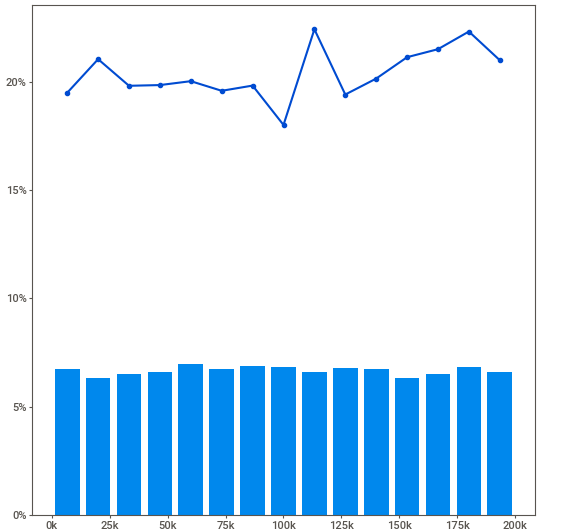
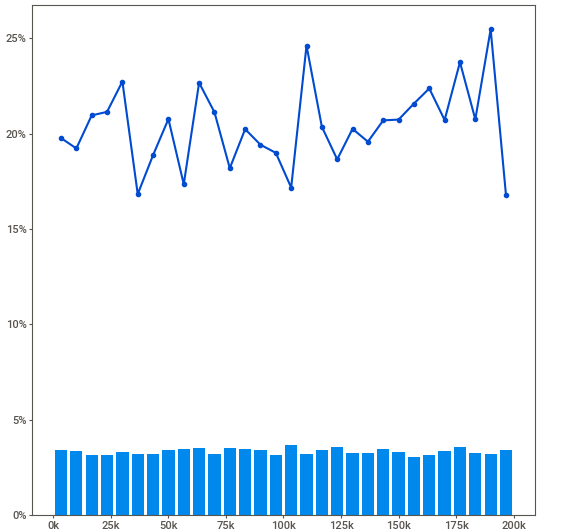
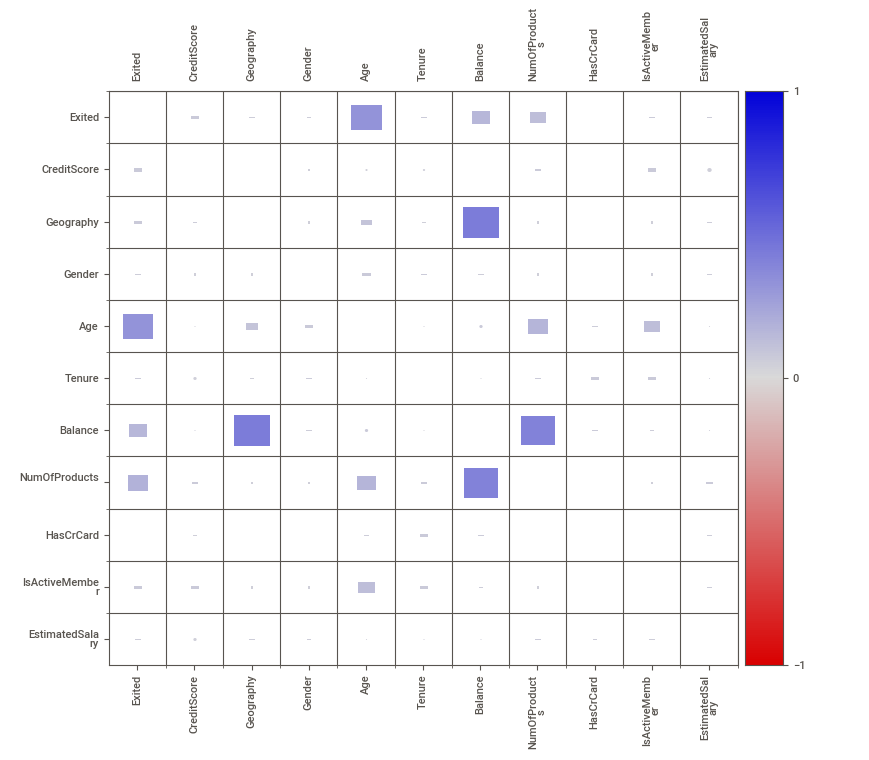
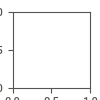

In [20]:
import sweetviz # for visualizing the data

my_report = sweetviz.analyze([df, "original data"],target_feat='Exited')

my_report.show_notebook(layout="vertical", w ="980", h= 700, scale= .8)

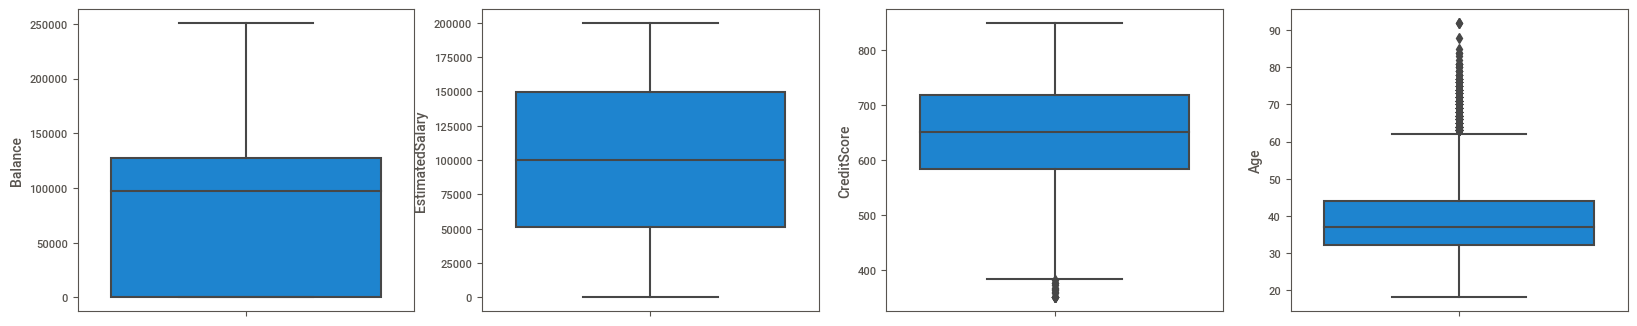

In [34]:
plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
ax = sns.boxplot(y = df["Balance"])

plt.subplot(1,4,2)
ax = sns.boxplot(y = df["EstimatedSalary"])

plt.subplot(1,4,3)
ax = sns.boxplot(y = df["CreditScore"])

plt.subplot(1,4,4)
ax = sns.boxplot(y = df["Age"]);

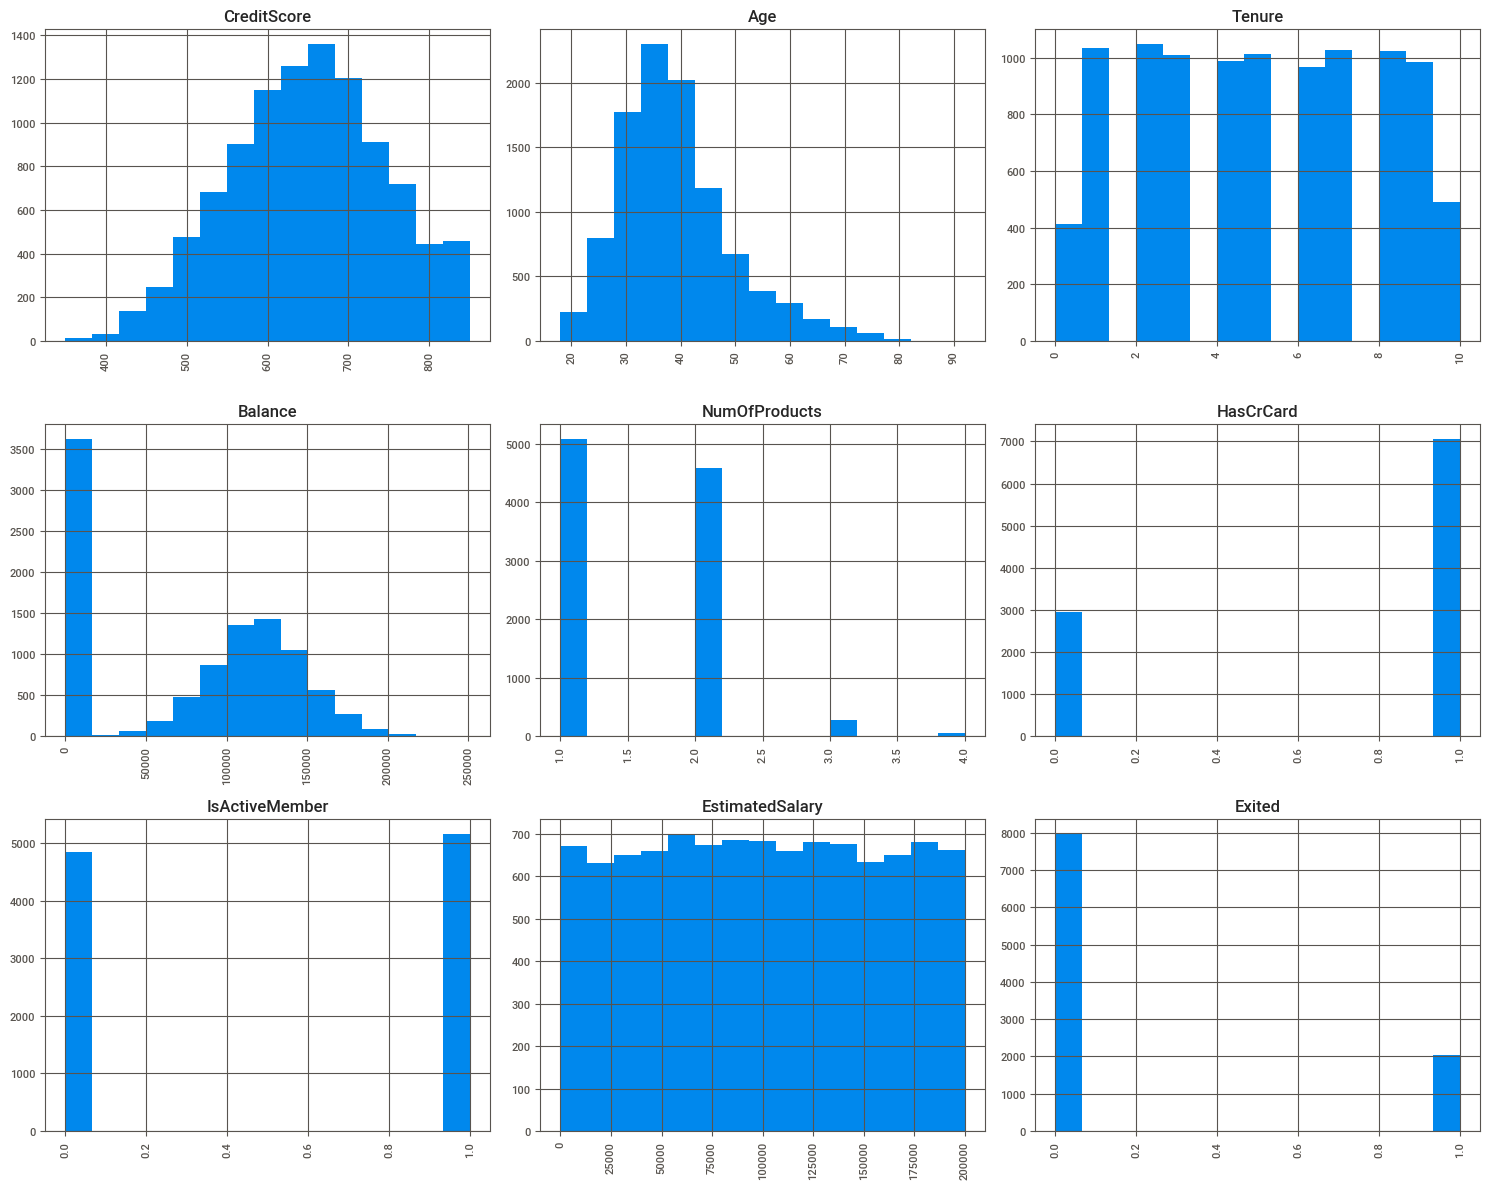

In [26]:
df.hist(figsize=(15, 12), bins=15, xrot=90);
plt.tight_layout()


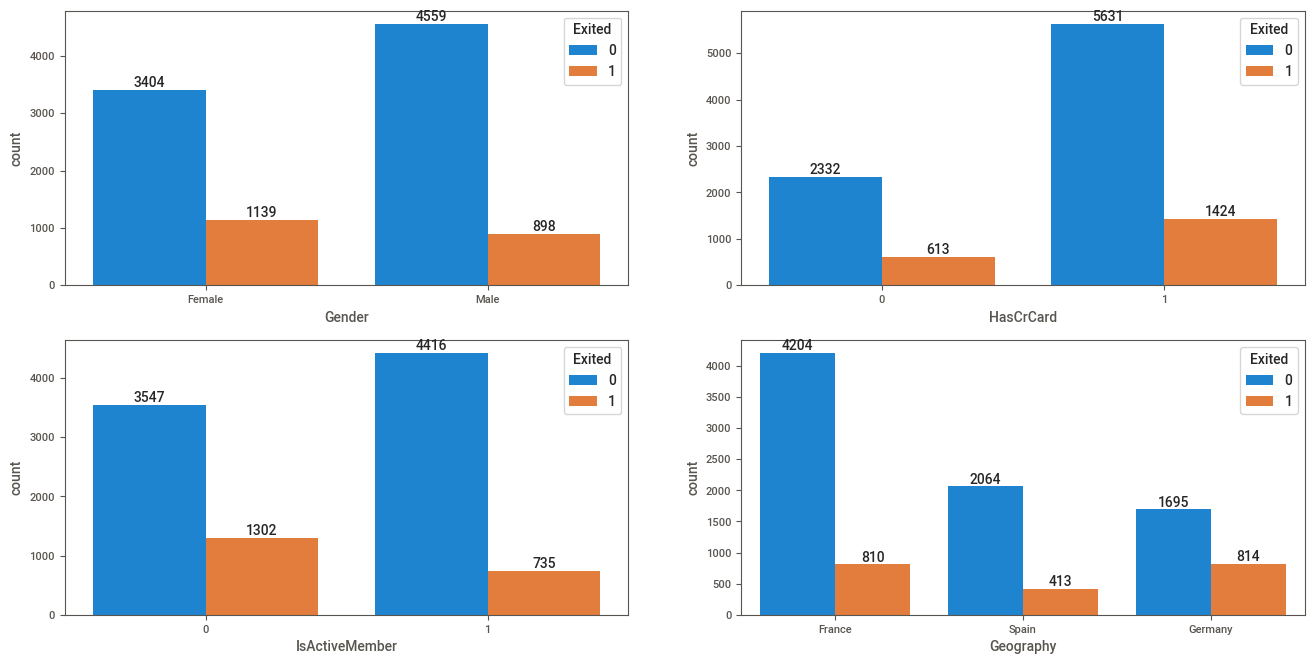

In [29]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 8))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data=df, x=i, hue="Exited")
    for i in ax.containers:
        ax.bar_label(i);

In [35]:
df.groupby("Age")["Exited"].value_counts()


Age  Exited
18   0         20
     1          2
19   0         26
     1          1
20   0         38
               ..
84   0          1
     1          1
85   0          1
88   0          1
92   0          2
Name: Exited, Length: 128, dtype: int64

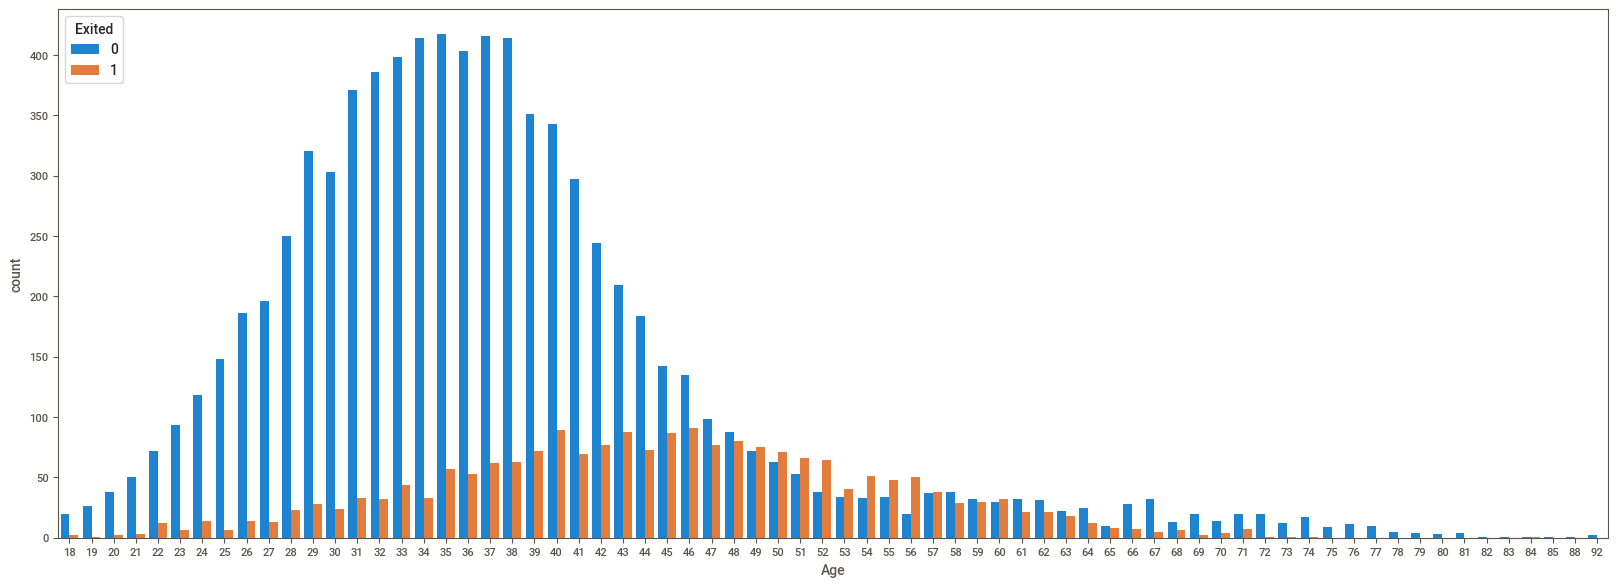

In [36]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

In [37]:
df.CreditScore.describe()

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: CreditScore, dtype: float64

In [38]:
def credit_transformer(x, y):
    """to prodduce a new value by using credit score and has credit card"""

    if x < 350 and y == 0:
        return 0
    if x < 350 and y > 0:
        return 1
    if x < 718 and y == 0:
        return 2
    if x < 718 and y > 0:
        return 3
    else:
        return 4

In [39]:
customer_value = [credit_transformer(x, y) for x, y in zip(df.CreditScore, df.HasCrCard)]
customer_value[:10]

[3, 2, 3, 2, 4, 3, 4, 3, 2, 3]

In [40]:
df.insert(10, "customer_value", customer_value)

In [23]:
df.customer_value

RowNumber
1        3
2        2
3        3
4        2
5        4
        ..
9996     4
9997     3
9998     2
9999     4
10000    4
Name: customer_value, Length: 10000, dtype: int64

----

<AxesSubplot:>

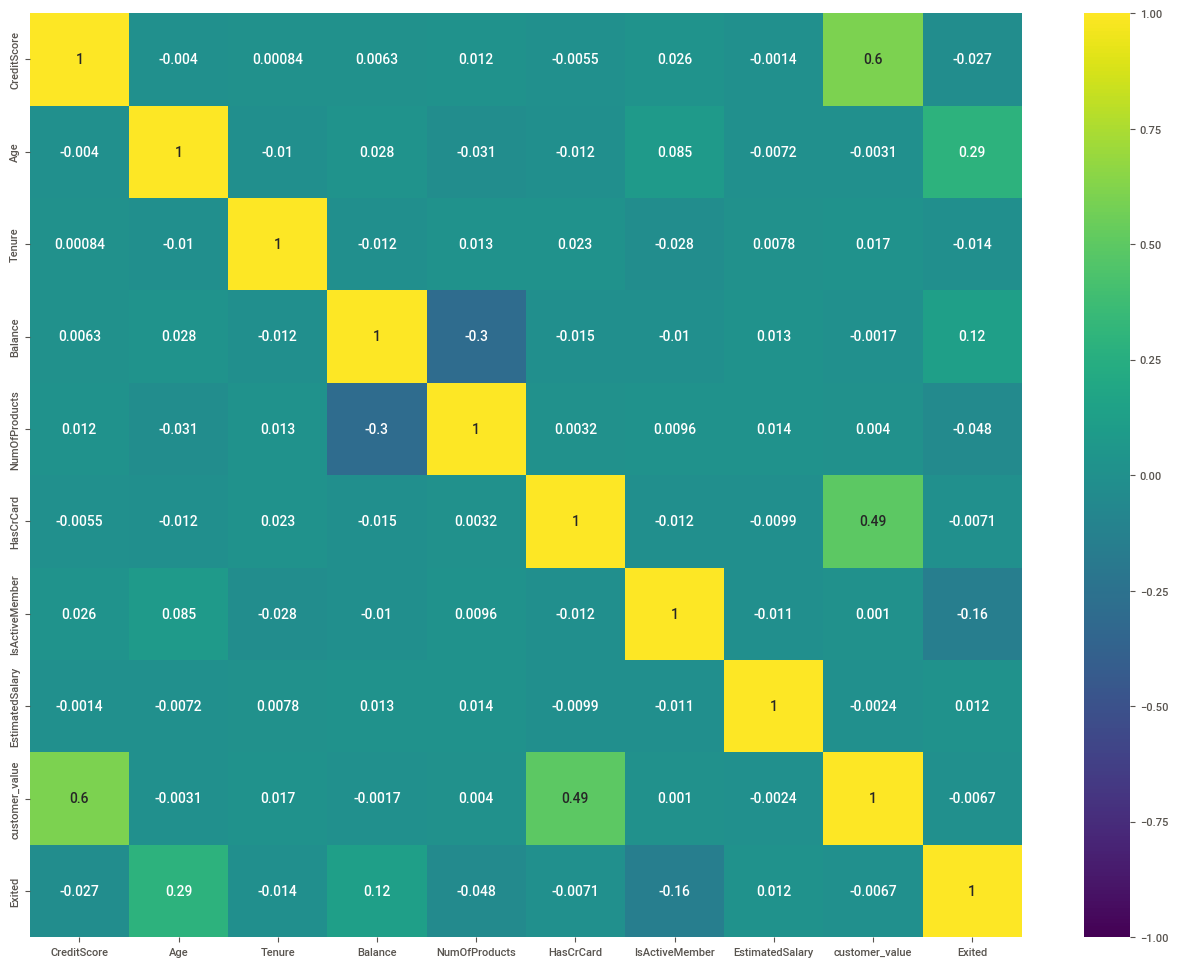

In [24]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis',vmin= -1,vmax=1)

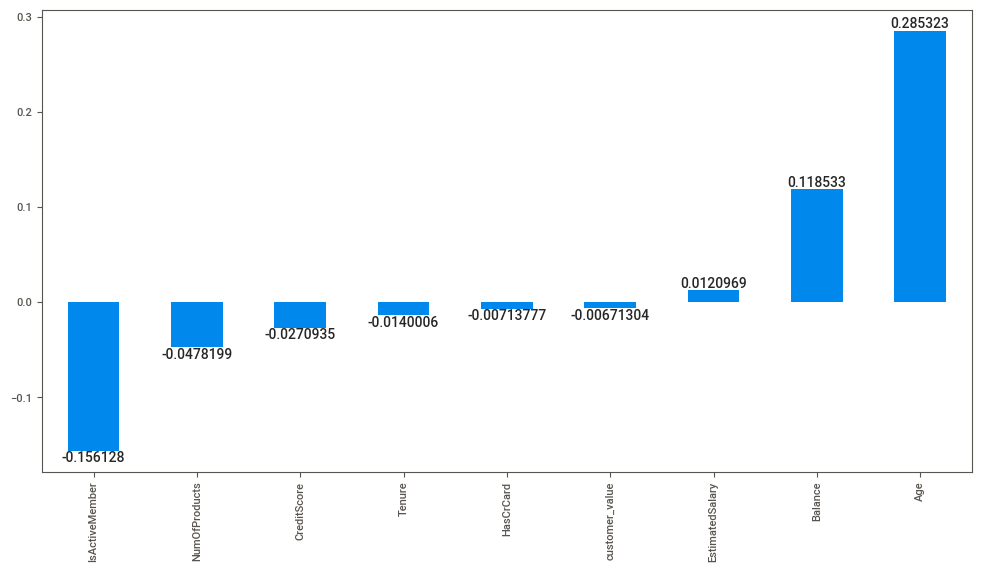

In [25]:
ax = df.corr()['Exited'][:-1].sort_values().plot.bar()
ax.bar_label(ax.containers[0]);

## Preprocessing of Data

In [26]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.15, random_state=42)

In [28]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns

encoder = OneHotEncoder(categories="auto",
                        sparse=False, 
                        drop="first", 
                        handle_unknown="ignore")

In [29]:
transformers=[('cat', encoder ,cat_col)]

col_transformer = ColumnTransformer(transformers=transformers, remainder='passthrough')

In [30]:
X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

In [31]:
scaler = MinMaxScaler() # Minmax scaler mostly used for deep learning as a rule of thumb

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

<span class="mark">How many hidden layers should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
How many hidden units should I use? : http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html (mirror: http://francky.me/aifaq/FAQ-comp.ai.neural-net.pdf)
What is genetic algorithm? : https://www.researchgate.net/post/What_is_genetic_algorithm1
Genetic algorithm + neural networks: http://francky.me/doc/mrf2011-HEC-ISIR-ENS_en.pdf (chapter 2.2)</span>

### without class_weigth

In [33]:
tf.random.set_seed(42) # for reproducibility

model = Sequential() # instantiate the model

model.add(Dense(16, activation="relu")) # add the input layer and the first hidden layer
model.add(Dense(8, activation="relu"))  # add the second hidden layer
model.add(Dense(1, activation="sigmoid")) # add the output layer

opt = Adam(lr=0.001) # optimizer 
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) # loss function and metrics

<span class="burk">The patience is often set somewhere between 10 and 100 (10 or 20 is more common), but it really depends on your dataset and network.</span>

In [34]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=11,
                           restore_best_weights = True)

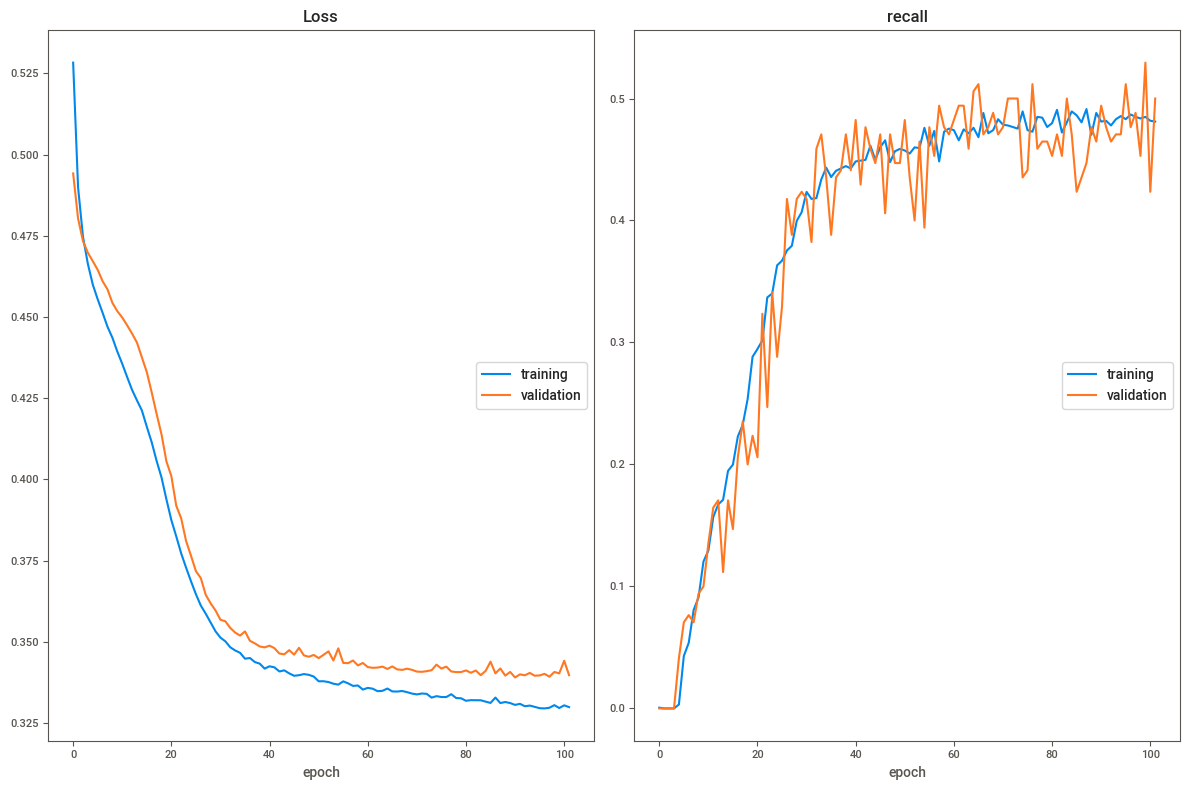

Loss
	training         	 (min:    0.329, max:    0.528, cur:    0.330)
	validation       	 (min:    0.339, max:    0.494, cur:    0.340)
recall
	training         	 (min:    0.000, max:    0.491, cur:    0.481)
	validation       	 (min:    0.000, max:    0.529, cur:    0.500)
60/60 [==============================] - 0s 5ms/step - loss: 0.3299 - recall: 0.4811 - val_loss: 0.3397 - val_recall: 0.5000
Epoch 00102: early stopping


In [35]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop,PlotLossesKerasTF()])

In [36]:
model.summary() # summary of the model, how many layers, how many nodes in each layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

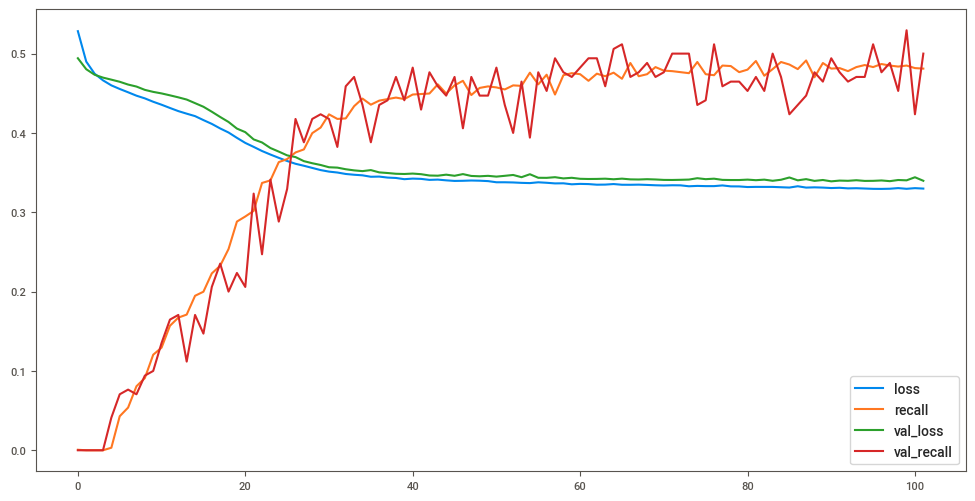

In [37]:
# loss function history for each epoch
loss_df = pd.DataFrame(model.history.history) 
loss_df.plot()

In [38]:
y_pred = (model.predict(X_test) > .5).astype("int32") # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1129   65]
 [ 159  147]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1194
           1       0.69      0.48      0.57       306

    accuracy                           0.85      1500
   macro avg       0.78      0.71      0.74      1500
weighted avg       0.84      0.85      0.84      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

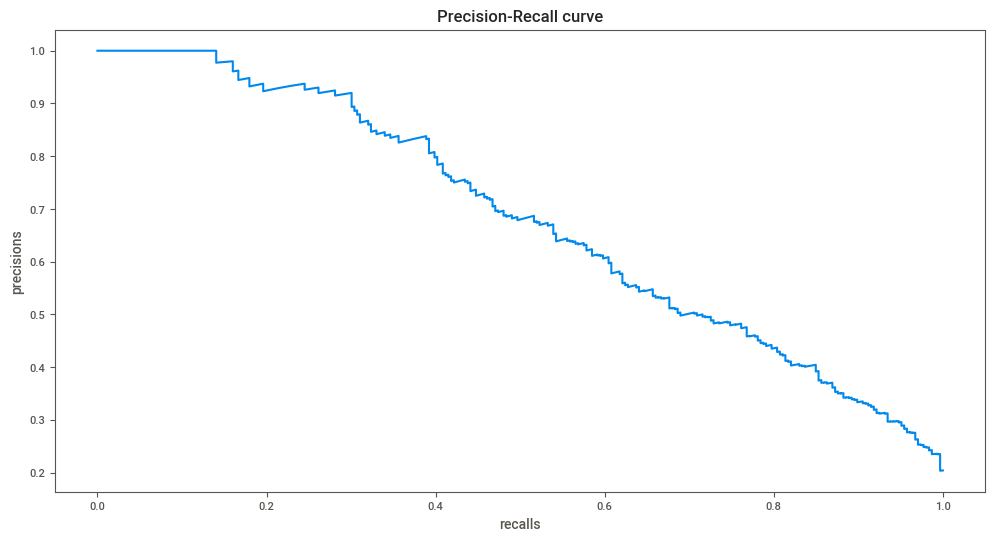

In [39]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [40]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score  

0.6813477909847775

In [41]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

### with class_weigth

In [42]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [43]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [44]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

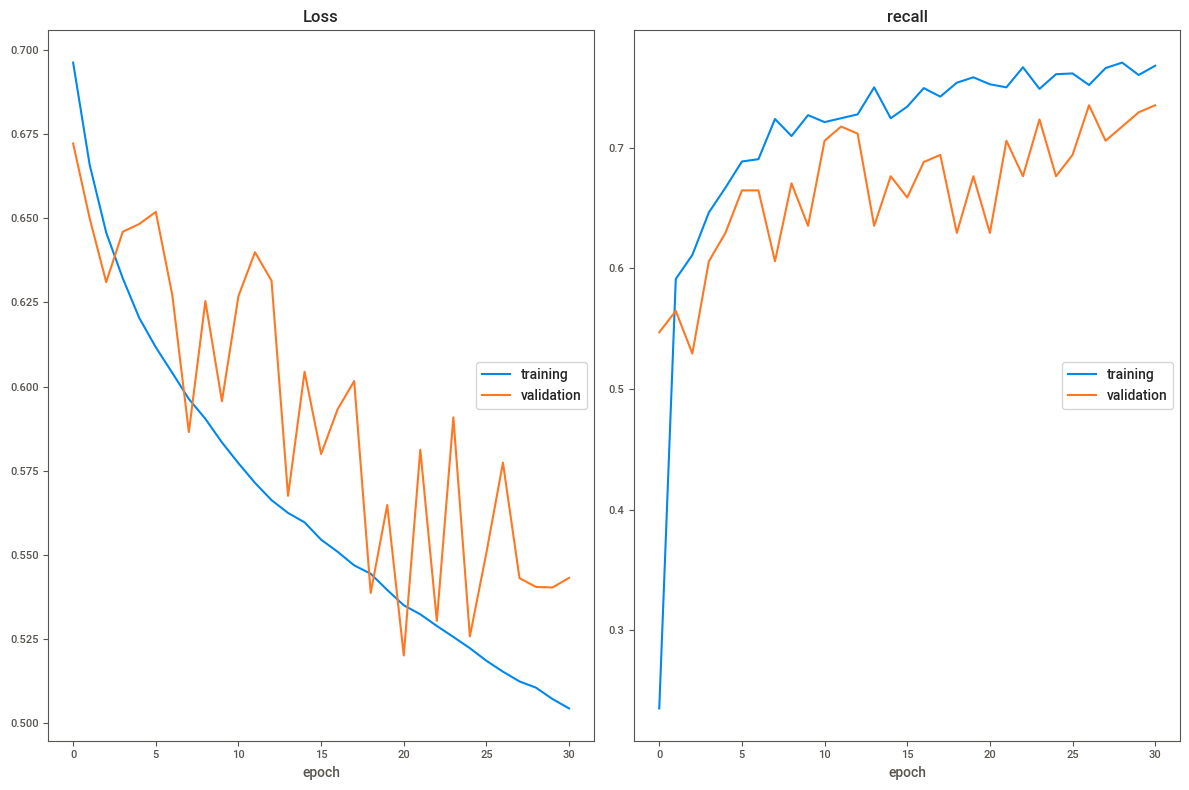

Loss
	training         	 (min:    0.504, max:    0.696, cur:    0.504)
	validation       	 (min:    0.520, max:    0.672, cur:    0.543)
recall
	training         	 (min:    0.235, max:    0.771, cur:    0.768)
	validation       	 (min:    0.529, max:    0.735, cur:    0.735)
60/60 [==============================] - 0s 5ms/step - loss: 0.5044 - recall: 0.7681 - val_loss: 0.5432 - val_recall: 0.7353
Epoch 00031: early stopping


In [45]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop,PlotLossesKerasTF()],
          class_weight=class_weights)

<AxesSubplot:>

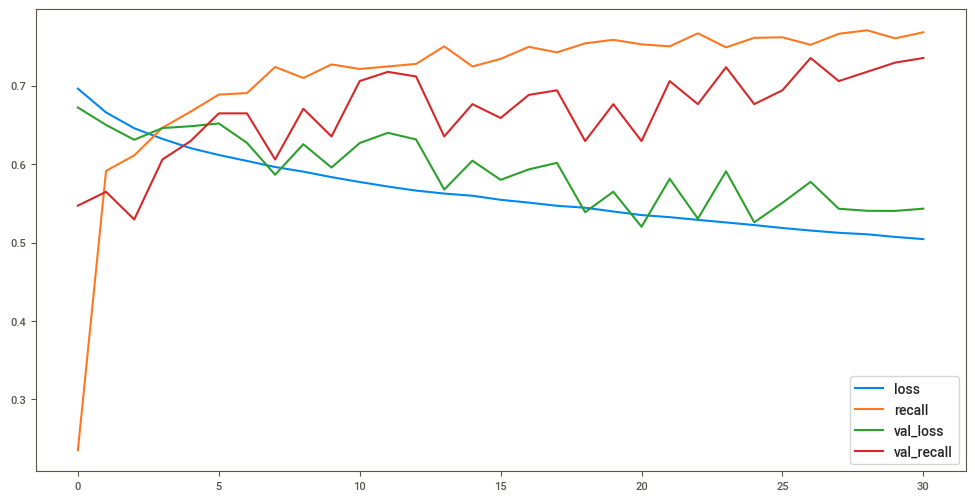

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [47]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[923 271]
 [100 206]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1194
           1       0.43      0.67      0.53       306

    accuracy                           0.75      1500
   macro avg       0.67      0.72      0.68      1500
weighted avg       0.81      0.75      0.77      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

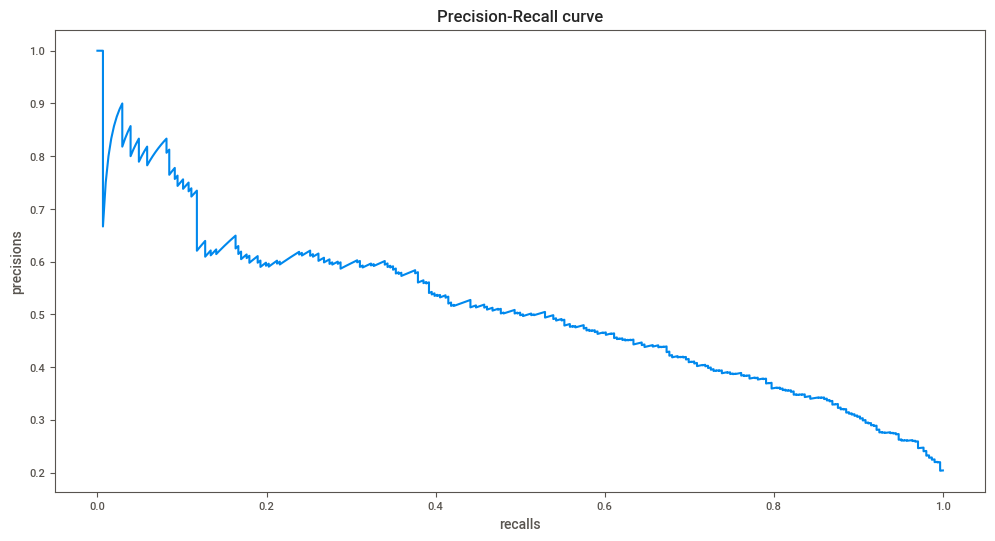

In [48]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [49]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.5094393144904867

In [50]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

## GridSearchCV

In [51]:
# to use the model in sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [52]:
# function to build the model
def build_classifier(optimizer,learn_rate): 
    tf.random.set_seed(42)
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [53]:
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

In [54]:
classifier = KerasClassifier(build_fn=build_classifier, 
                             validation_split = 0.1, 
                             epochs=150) # instantiate the classifier
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop] #, Adadelta, Nadam],
    'learn_rate': [0.001, 0.003,0.004]
} # parameters to tune
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1).fit(X_train,
                                         y_train,
                                         class_weight=class_weights,
                                         ) # grid search to find the best parameters

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/150
30/30 [==============================] - 0s 13ms/step - loss: 0.6798 - recall: 0.4606 - val_loss: 0.6842 - val_recall: 0.6941
Epoch 2/150
30/30 [==============================] - 0s 1ms/step - loss: 0.6387 - recall: 0.6361 - val_loss: 0.6471 - val_recall: 0.6000
Epoch 3/150
30/30 [==============================] - 0s 1ms/step - loss: 0.6171 - recall: 0.6605 - val_loss: 0.6510 - val_recall: 0.6824
Epoch 4/150
30/30 [==============================] - 0s 1ms/step - loss: 0.6022 - recall: 0.7143 - val_loss: 0.5510 - val_recall: 0.4941
Epoch 5/150
30/30 [==============================] - 0s 1ms/step - loss: 0.5893 - recall: 0.7047 - val_loss: 0.6419 - val_recall: 0.7176
Epoch 6/150
30/30 [==============================] - 0s 1ms/step - loss: 0.5748 - recall: 0.7245 - val_loss: 0.6108 - val_recall: 0.6882
Epoch 7/150
30/30 [==============================] - 0s 989us/step - loss: 0.5628 - recall: 0.7162 - val_loss: 0.65

In [55]:
grid_model.best_score_ # best score according to the scoring function

0.8191480119388233

In [56]:
grid_model.best_params_ # best parameters to get the best score

{'batch_size': 256,
 'learn_rate': 0.004,
 'optimizer': tensorflow.python.keras.optimizer_v2.adam.Adam}

In [57]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[962 232]
 [ 83 223]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1194
           1       0.49      0.73      0.59       306

    accuracy                           0.79      1500
   macro avg       0.71      0.77      0.72      1500
weighted avg       0.83      0.79      0.80      1500



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

Instructions for updating:
Please use `model.predict()` instead.


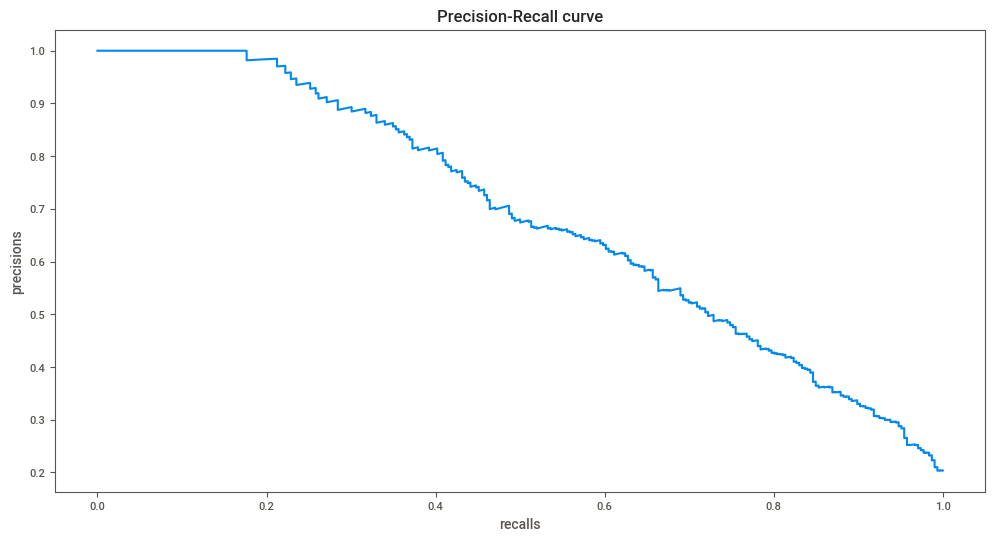

In [58]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [59]:
grid_pre_score = average_precision_score(y_test, y_pred_proba)
grid_pre_score  

0.6888477792969291

In [60]:
grid_weighted_f1 = f1_score(y_test, y_pred)
grid_weighted_recall = recall_score(y_test, y_pred)

## Model Comparission

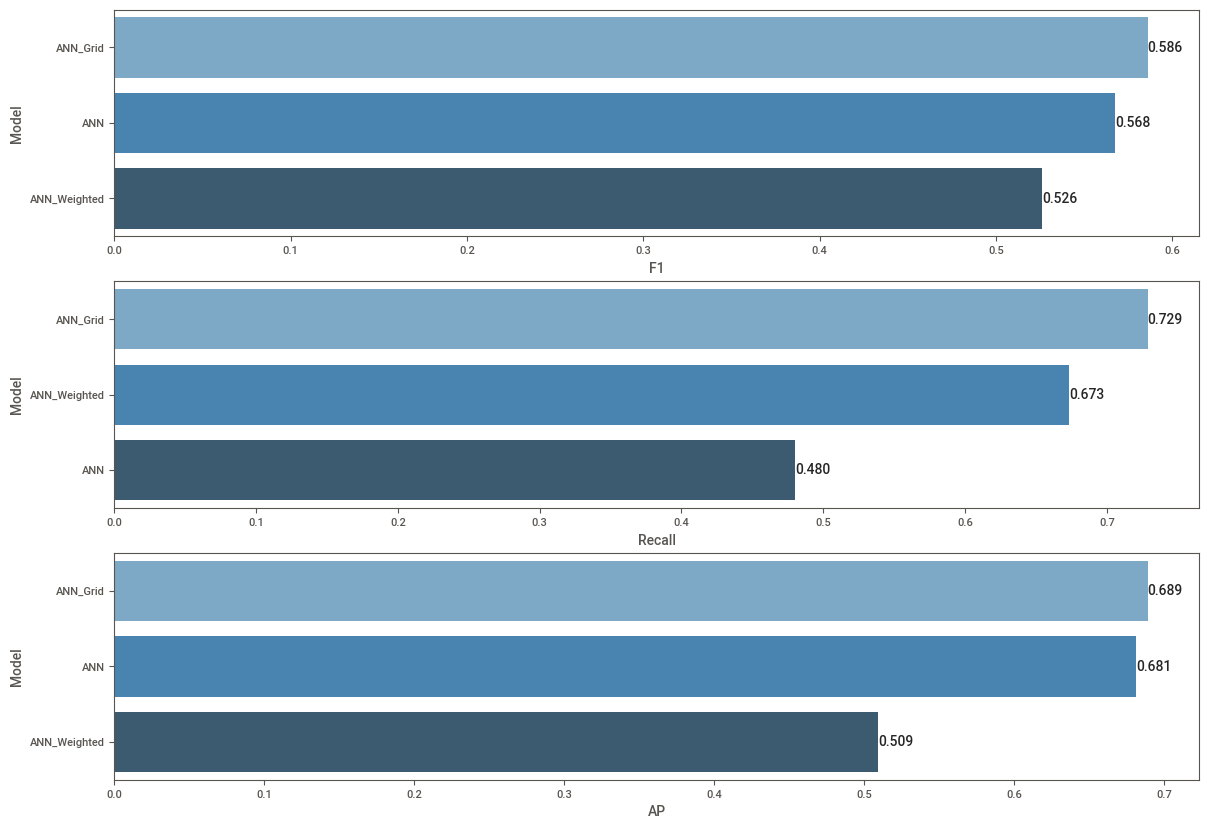

In [61]:
compare = pd.DataFrame({"Model": ["ANN", "ANN_Weighted",  "ANN_Grid"],
                        "F1": [non_weighted_f1, weighted_f1, grid_weighted_f1],
                        "Recall": [non_weighted_recall, weighted_recall, grid_weighted_recall],
                        "AP": [non_weighted_pre_score, weighted_pre_score, grid_pre_score]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Final Model and Model Deployment

In [62]:
import pickle # to save the model or scalling parameters

pickle.dump(col_transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", 'wb')) # to save the scaler


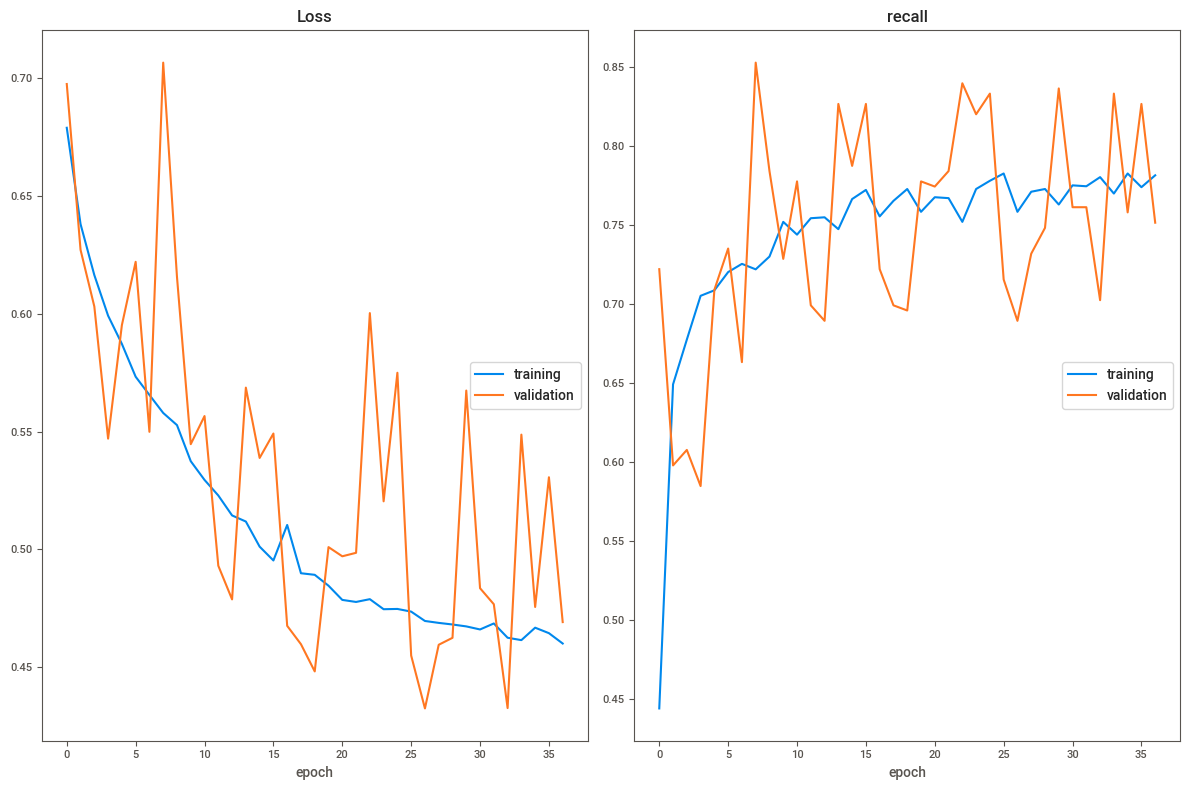

Loss
	training         	 (min:    0.460, max:    0.679, cur:    0.460)
	validation       	 (min:    0.432, max:    0.707, cur:    0.469)
recall
	training         	 (min:    0.444, max:    0.783, cur:    0.782)
	validation       	 (min:    0.585, max:    0.853, cur:    0.752)
34/34 [==============================] - 0s 8ms/step - loss: 0.4599 - recall: 0.7816 - val_loss: 0.4690 - val_recall: 0.7516
Epoch 00037: early stopping


In [87]:
tf.random.set_seed(42)
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.004),
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop, PlotLossesKerasTF()],
          batch_size=256,
          epochs=150,
          verbose=1,
          class_weight=class_weights)

<AxesSubplot:>

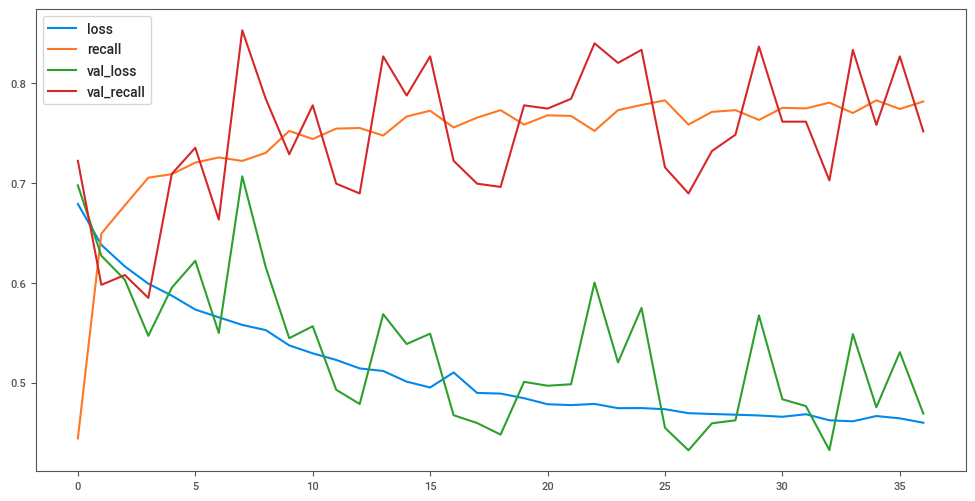

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [89]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[972 222]
 [ 95 211]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1194
           1       0.49      0.69      0.57       306

    accuracy                           0.79      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.82      0.79      0.80      1500



In [90]:
model.save('model_churn.h5')

### Prediction

In [67]:
single_customer = df.drop('Exited', axis=1).iloc[[0]]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,customer_value
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.000,1,1,1,101348.880,3


In [91]:
single_customer1 = single_customer.copy()
single_customer1["Geography"] = "Germany"
single_customer1["Age"] = 45
single_customer1["Balance"] = 250000

In [92]:

single_customer1 = col_transformer.transform(single_customer1)
single_customer1

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
        4.5000000e+01, 2.0000000e+00, 2.5000000e+05, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0134888e+05, 3.0000000e+00]])

In [93]:
single_customer1 = scaler.transform(single_customer1)
single_customer1

array([[1.        , 0.        , 0.        , 0.538     , 0.36486486,
        0.2       , 1.04871244, 0.        , 1.        , 1.        ,
        0.50673489, 0.5       ]])

In [94]:
model.predict(single_customer1)

array([[0.834241]], dtype=float32)

In [95]:
(model.predict(single_customer1) > 0.5).astype("int32")

array([[1]])

In [96]:
model.predict_classes(single_customer1)

array([[1]])

---
---

## Comparison with ML

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [75]:
clf1 = RandomForestClassifier(random_state=42, class_weight="balanced") 
clf2 = SVC(probability=True, random_state=42, class_weight="balanced")
clf3 = LogisticRegression(random_state=42, class_weight="balanced")

In [76]:
# Initilaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2+i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2+i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [77]:
pipeline = Pipeline([('classifier', clf1)]) # pipeline to combine the classifiers
params = [param1, param2, param3] # list of dictionaries to tune the hyperparameters

In [78]:
grid_model = RandomizedSearchCV(pipeline, params, cv=5, n_jobs=-1,
                  scoring='recall').fit(X_train, y_train)

In [79]:
grid_model.best_params_ # best parameters to get the best score

{'classifier__C': 10,
 'classifier': SVC(C=10, class_weight='balanced', probability=True, random_state=42)}

In [80]:
grid_model.best_score_ # best score according to the scoring function

0.7204094551148573

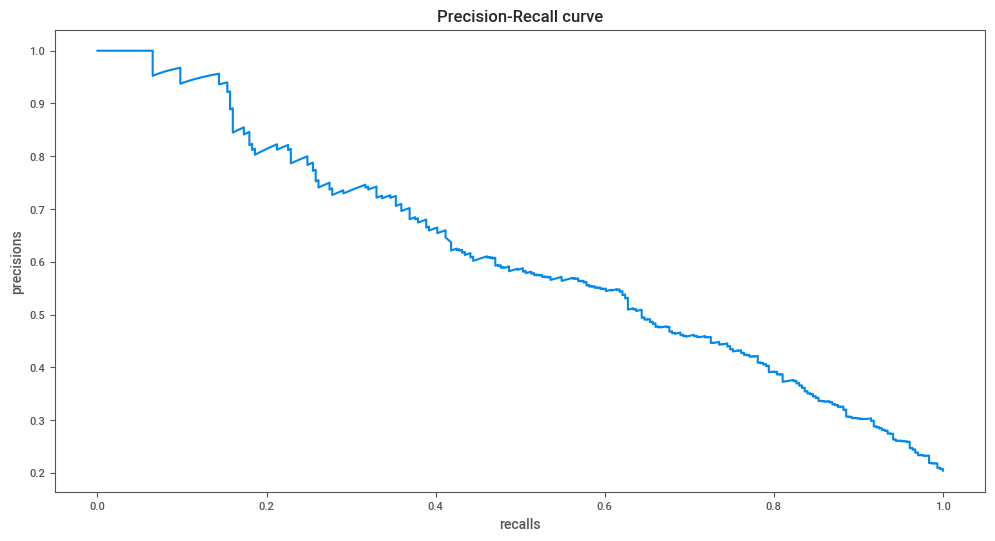

In [81]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [82]:
average_precision_score(y_test, y_pred_proba)

0.6094546274152512

In [83]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[947 247]
 [ 95 211]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1194
           1       0.46      0.69      0.55       306

    accuracy                           0.77      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.82      0.77      0.79      1500



---
---